In [1]:
%run import_util.py
import scan_api
import util

START loading util functions
DONE loading util functions


In [2]:
# set the data folder to work on
util.data_directory="./data/"
print(util.data_directory)
n=2
n1=10

./data/


In [3]:
from datetime import date, timedelta
dataLatestdate = date.today()- timedelta(1)

# m/dd/yy
dateStr=dataLatestdate.strftime("%#m_%d_%y")
print("dateStr =", dateStr)

dateStr = 4_29_20


Read all Data

In [4]:
covid=util.read_file("generated_data/covid_"+dateStr+".csv")
malaria=util.read_file("generated_data/malaria.csv")
population=util.read_file("generated_data/world_population.csv")
bcg=util.read_file("generated_data/bcg_coverage.csv")

# Start EDA

In [5]:
countryList=util.countryList
# check if all country data present
print("countryList length : ",len(countryList))
print("population_df has : ",len(population[population['country'].isin(countryList)]))
print("covid_df has : ",len(covid[covid['country'].isin(countryList)]))
print("bcg_df has : ",len(bcg[bcg['country'].isin(countryList)]))
print("malaria_df has : ",len(malaria[malaria['country'].isin(countryList)]))

# display(countryList)
# bcg[bcg['country'].isin(countryList)]

countryList length :  24
population_df has :  24
covid_df has :  24
bcg_df has :  16
malaria_df has :  5


In [6]:
display(population.head(n))
display(covid.head(n))
display(bcg.head(n))
display(malaria.head(n))

,country,poptotal_young,poptotal_old,poptotal,young_perc,old_perc
0,Afghanistan,37897103.0,1031238.0,38928341.0,97.350933,2.649067
1,Albania,2454631.0,423169.0,2877800.0,85.295399,14.704601


,country,covid_deaths,covid_cases,covid_recovered
0,Afghanistan,60,1939,252
1,Albania,30,766,455


,country,bcg_coverage_latest,bcg_coverage_mean,bcg_coverage_max
0,Afghanistan,98.0,49.9,98.0
1,Albania,99.0,93.9,99.5


,country,malaria_cases,malaria_cases_mean,malaria_cases_max
0,Afghanistan,54840.0,146317.0,415356.0
1,Algeria,59.0,13.0,59.0


In [7]:
display(population.info())
display(covid.info())
display(bcg.info())
display(malaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
country           201 non-null object
poptotal_young    201 non-null float64
poptotal_old      201 non-null float64
poptotal          201 non-null float64
young_perc        201 non-null float64
old_perc          201 non-null float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
country            185 non-null object
covid_deaths       185 non-null int64
covid_cases        185 non-null int64
covid_recovered    185 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
country                177 non-null object
bcg_coverage_latest    176 non-null float64
bcg_coverage_mean      177 non-null float64
bcg_coverage_max       177 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
country               95 non-null object
malaria_cases         95 non-null float64
malaria_cases_mean    95 non-null float64
malaria_cases_max     95 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


None

In [8]:
covid_population=pd.merge(covid,population,on=["country"],how="left")

covid_population['covid_deaths_perc']=(covid_population['covid_deaths']*100)/(covid_population['poptotal'])
covid_population['covid_cases_perc']=(covid_population['covid_cases']*100)/(covid_population['poptotal'])
covid_population['covid_recovered_perc']=(covid_population['covid_recovered']*100)/(covid_population['poptotal'])


covid_population['covid_deaths_perm']=(covid_population['covid_deaths'])/(covid_population['poptotal'])*1000000
covid_population['covid_cases_perm']=(covid_population['covid_cases'])/(covid_population['poptotal'])*1000000
covid_population['covid_recovered_perm']=(covid_population['covid_recovered'])/(covid_population['poptotal'])*1000000

# covid_population['covid_deaths_perc']=(covid_population['covid_deaths']*100)/(covid_population['poptotal']*1000)
# covid_population['covid_cases_perc']=(covid_population['covid_cases']*100)/(covid_population['poptotal']*1000)
# covid_population['covid_recovered_perc']=(covid_population['covid_recovered']*100)/(covid_population['poptotal']*1000)

display(covid_population.head(n))
covid_population.info()
display(covid_population.isnull().sum())

,country,covid_deaths,covid_cases,covid_recovered,poptotal_young,poptotal_old,poptotal,young_perc,old_perc,covid_deaths_perc,covid_cases_perc,covid_recovered_perc,covid_deaths_perm,covid_cases_perm,covid_recovered_perm
0,Afghanistan,60,1939,252,37897103.0,1031238.0,38928341.0,97.350933,2.649067,0.000154,0.004981,0.000647,1.541294,49.809469,6.473433
1,Albania,30,766,455,2454631.0,423169.0,2877800.0,85.295399,14.704601,0.001042,0.026618,0.015811,10.424630,266.175551,158.106887


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 15 columns):
country                 185 non-null object
covid_deaths            185 non-null int64
covid_cases             185 non-null int64
covid_recovered         185 non-null int64
poptotal_young          168 non-null float64
poptotal_old            168 non-null float64
poptotal                168 non-null float64
young_perc              168 non-null float64
old_perc                168 non-null float64
covid_deaths_perc       168 non-null float64
covid_cases_perc        168 non-null float64
covid_recovered_perc    168 non-null float64
covid_deaths_perm       168 non-null float64
covid_cases_perm        168 non-null float64
covid_recovered_perm    168 non-null float64
dtypes: float64(11), int64(3), object(1)
memory usage: 23.1+ KB


country                  0
covid_deaths             0
covid_cases              0
covid_recovered          0
poptotal_young          17
poptotal_old            17
poptotal                17
young_perc              17
old_perc                17
covid_deaths_perc       17
covid_cases_perc        17
covid_recovered_perc    17
covid_deaths_perm       17
covid_cases_perm        17
covid_recovered_perm    17
dtype: int64

In [9]:
covid_bcg=pd.merge(covid_population,bcg,on=["country"],how="left")

display(covid_bcg.head(n))
covid_bcg.info()
display(covid_bcg.isnull().sum())

,country,covid_deaths,covid_cases,covid_recovered,poptotal_young,poptotal_old,poptotal,young_perc,old_perc,covid_deaths_perc,covid_cases_perc,covid_recovered_perc,covid_deaths_perm,covid_cases_perm,covid_recovered_perm,bcg_coverage_latest,bcg_coverage_mean,bcg_coverage_max
0,Afghanistan,60,1939,252,37897103.0,1031238.0,38928341.0,97.350933,2.649067,0.000154,0.004981,0.000647,1.541294,49.809469,6.473433,98.0,49.9,98.0
1,Albania,30,766,455,2454631.0,423169.0,2877800.0,85.295399,14.704601,0.001042,0.026618,0.015811,10.424630,266.175551,158.106887,99.0,93.9,99.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 18 columns):
country                 185 non-null object
covid_deaths            185 non-null int64
covid_cases             185 non-null int64
covid_recovered         185 non-null int64
poptotal_young          168 non-null float64
poptotal_old            168 non-null float64
poptotal                168 non-null float64
young_perc              168 non-null float64
old_perc                168 non-null float64
covid_deaths_perc       168 non-null float64
covid_cases_perc        168 non-null float64
covid_recovered_perc    168 non-null float64
covid_deaths_perm       168 non-null float64
covid_cases_perm        168 non-null float64
covid_recovered_perm    168 non-null float64
bcg_coverage_latest     153 non-null float64
bcg_coverage_mean       154 non-null float64
bcg_coverage_max        154 non-null float64
dtypes: float64(14), int64(3), object(1)
memory usage: 27.5+ KB


country                  0
covid_deaths             0
covid_cases              0
covid_recovered          0
poptotal_young          17
poptotal_old            17
poptotal                17
young_perc              17
old_perc                17
covid_deaths_perc       17
covid_cases_perc        17
covid_recovered_perc    17
covid_deaths_perm       17
covid_cases_perm        17
covid_recovered_perm    17
bcg_coverage_latest     32
bcg_coverage_mean       31
bcg_coverage_max        31
dtype: int64

In [10]:
mm = MinMaxScaler(feature_range=(0,100))
df_scaled=covid_bcg.copy()
df_scaled[['covid_deaths', 'covid_cases', 'covid_recovered',
       'covid_deaths_perc', 'covid_cases_perc', 'covid_recovered_perc',
           'covid_deaths_perm', 'covid_cases_perm', 'covid_recovered_perm',
       'bcg_coverage_latest', 'bcg_coverage_mean', 'bcg_coverage_max']]=mm.fit_transform(covid_bcg[['covid_deaths', 'covid_cases', 'covid_recovered',
       'covid_deaths_perc', 'covid_cases_perc', 'covid_recovered_perc',
        'covid_deaths_perm', 'covid_cases_perm', 'covid_recovered_perm',
       'bcg_coverage_latest', 'bcg_coverage_mean', 'bcg_coverage_max']])
display(covid_bcg[covid_bcg['country']=='USA'])
display(df_scaled[df_scaled['country']=='USA'])

,country,covid_deaths,covid_cases,covid_recovered,poptotal_young,poptotal_old,poptotal,young_perc,old_perc,covid_deaths_perc,covid_cases_perc,covid_recovered_perc,covid_deaths_perm,covid_cases_perm,covid_recovered_perm,bcg_coverage_latest,bcg_coverage_mean,bcg_coverage_max
171,USA,60967,1039909,120720,275953841.0,55048806.0,331002647.0,83.369074,16.630926,0.018419,0.314169,0.036471,184.188859,3141.693909,364.710074,NaN,NaN,NaN


,country,covid_deaths,covid_cases,covid_recovered,poptotal_young,poptotal_old,poptotal,young_perc,old_perc,covid_deaths_perc,covid_cases_perc,covid_recovered_perc,covid_deaths_perm,covid_cases_perm,covid_recovered_perm,bcg_coverage_latest,bcg_coverage_mean,bcg_coverage_max
171,USA,100.0,100.0,90.815398,275953841.0,55048806.0,331002647.0,83.369074,16.630926,28.458581,52.177362,7.284612,28.458581,52.177362,7.284612,NaN,NaN,NaN


In [11]:
def plotCovid(df1,title,xlabel='country',ylabel='percentage',
              plot_stats=['covid_deaths_perc','covid_cases_perc','bcg_coverage_latest'],
              plotN=200,
              plottKind='line',
              plotSize=(20, 6)):
    plot_stats_final=['country']+plot_stats
    df1_final=df1[plot_stats_final]

#     display(df1_final[df1_final['country']=='Italy'])
    
    df1_final=df1_final.head(plotN)

    fig, ax = plt.subplots(figsize=plotSize)
    ax.set_title(title + " , dated " + dataLatestdate.strftime("%d/%m/%y"))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    b=(df1_final[['country']])['country'].tolist() 
    ax.set_xticks( np.arange(len(b)))
    ax.set_xticklabels(b, rotation=45, horizontalalignment='center' )

    df1_final=df1_final.set_index('country')
    df1_final.plot(ax=ax,kind=plottKind)
    return ax
    

Unscaled graphs which show actual numbers


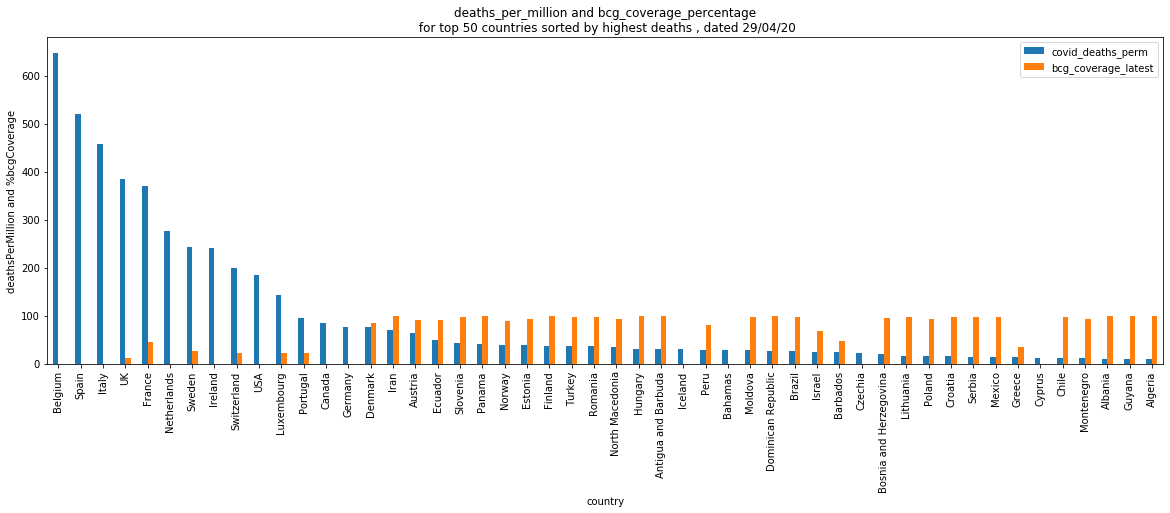

In [12]:
#unscaled charts
print("Unscaled graphs which show actual numbers")

#plot chart
df1_1=covid_bcg.sort_values('covid_deaths_perm',ascending=False)
ax1=plotCovid(df1_1,"deaths_per_million and bcg_coverage_percentage\n for top 50 countries sorted by highest deaths",
              ylabel='deathsPerMillion and %bcgCoverage',
          plot_stats=['covid_deaths_perm','bcg_coverage_latest'],
              plotN=50,
         plottKind='bar')

Unscaled graphs which show actual numbers
zoom to see details of the below chart


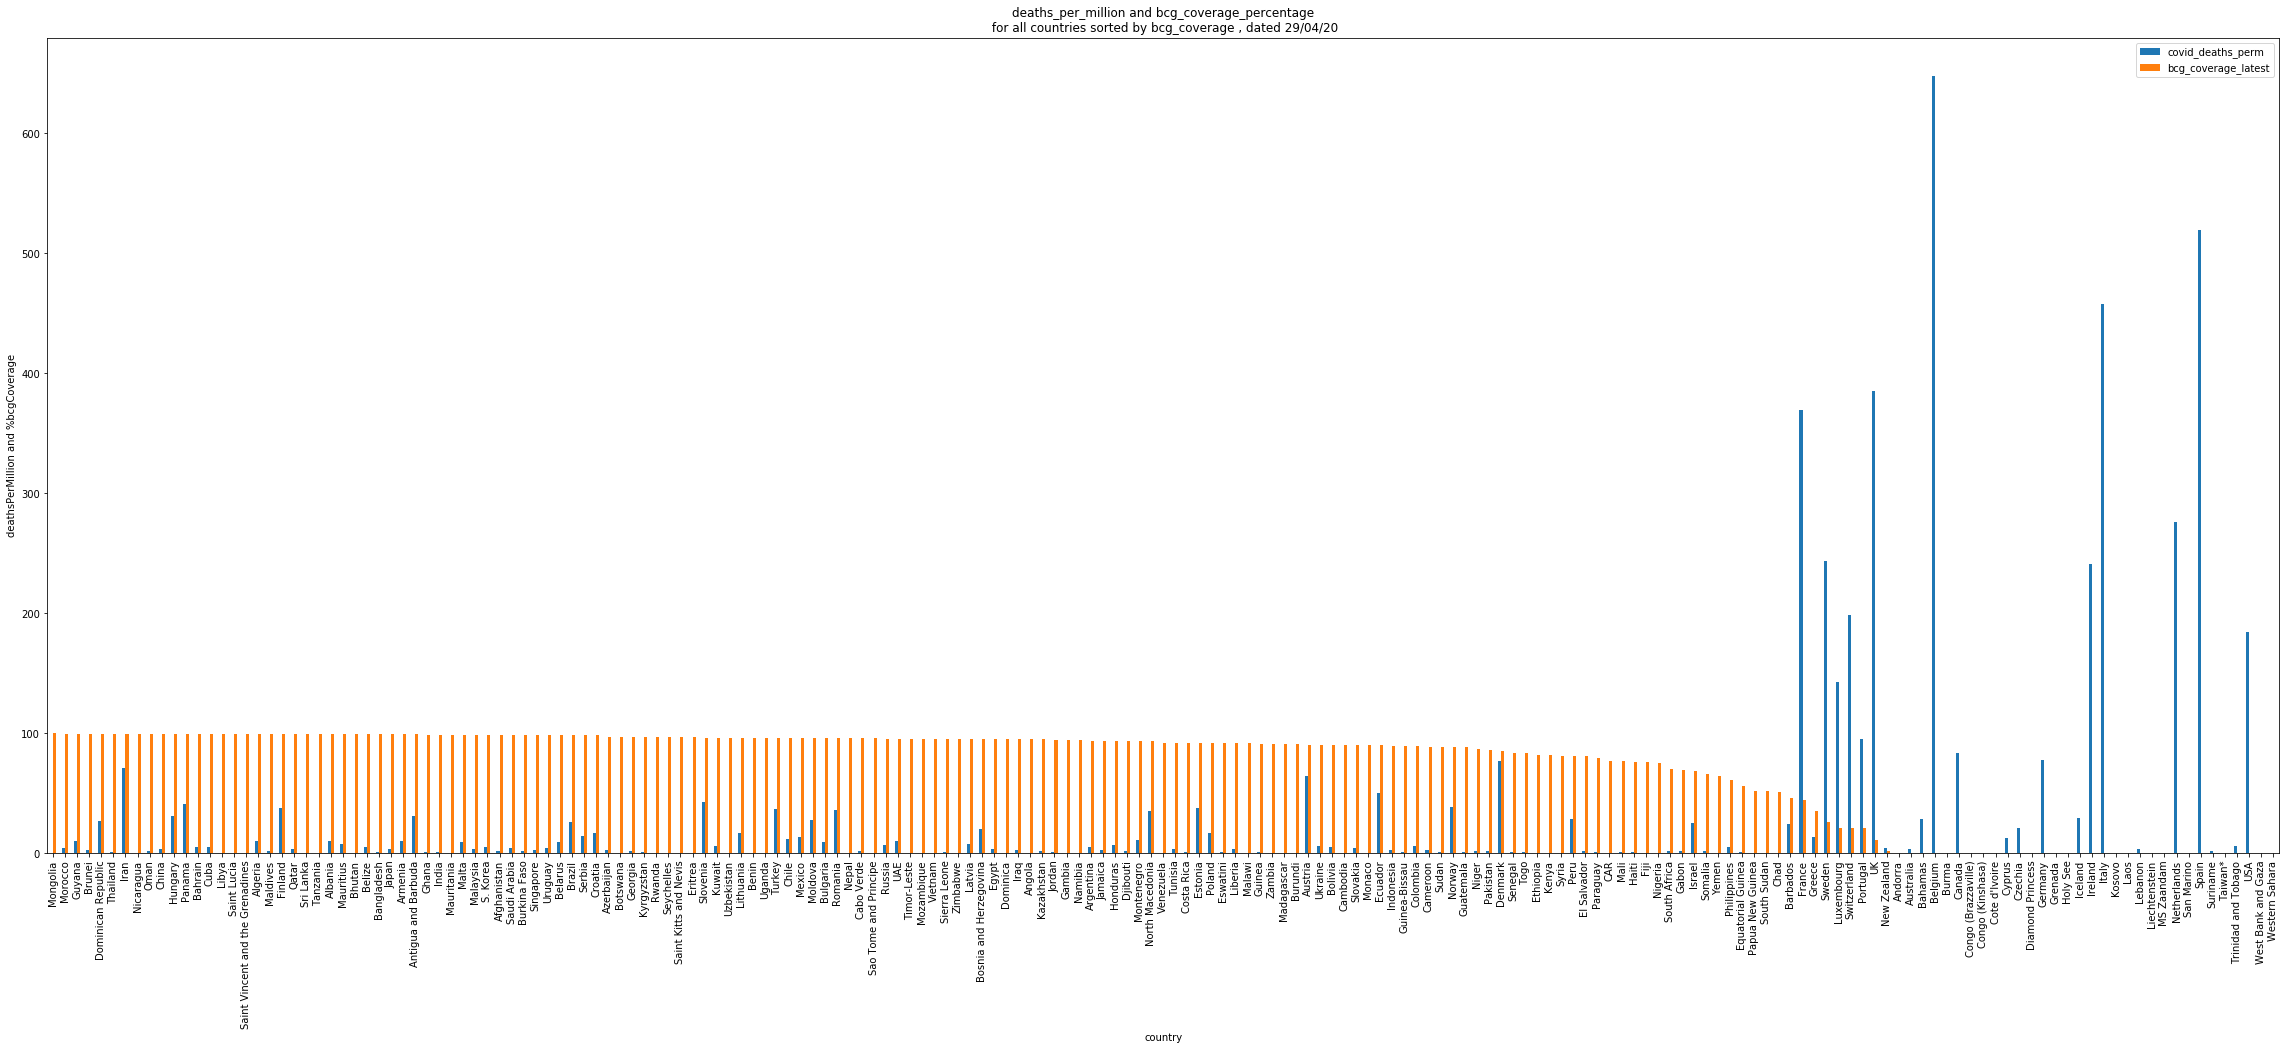

In [13]:
print("Unscaled graphs which show actual numbers")
print('zoom to see details of the below chart')

#plot chart
df1_1=covid_bcg.sort_values('bcg_coverage_latest',ascending=False)
ax1=plotCovid(df1_1,"deaths_per_million and bcg_coverage_percentage\n for all countries sorted by bcg_coverage",
              ylabel='deathsPerMillion and %bcgCoverage',
          plot_stats=['covid_deaths_perm','bcg_coverage_latest'],
             plotSize=(40, 15),
             plottKind='bar')

Scaled graphs which show numbers scaled to max_min values.
For e.g. to show death rates, a country which has highest death rate will be maked as 100%, and other country's death rates will be relative to this country.


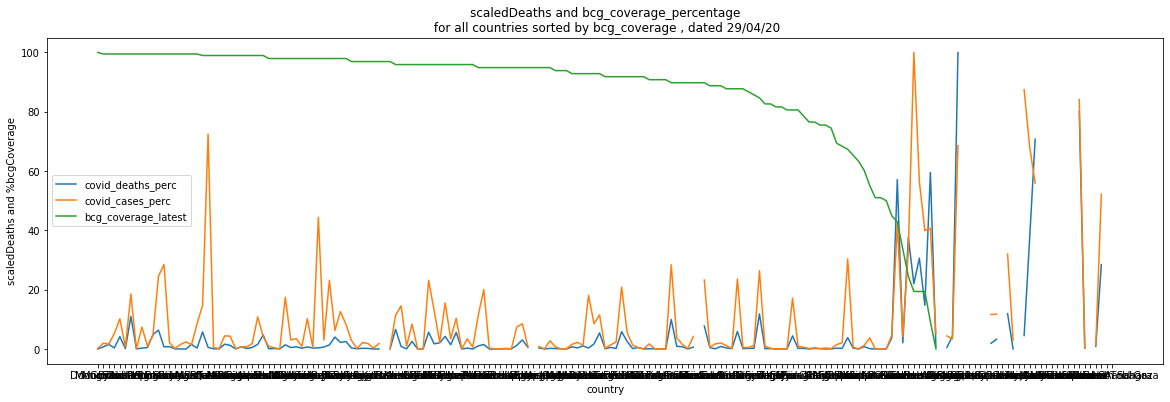

In [14]:
print("Scaled graphs which show numbers scaled to max_min values.\nFor e.g. to show death rates, a country which has highest death rate will be maked as 100%, and other country's death rates will be relative to this country.")

#plot chart
df1_1=df_scaled.sort_values('bcg_coverage_latest',ascending=False)
ax1=plotCovid(df1_1,"scaledDeaths and bcg_coverage_percentage\n for all countries sorted by bcg_coverage",
              ylabel='scaledDeaths and %bcgCoverage')

Scaled graphs which show numbers scaled to max_min values.
For e.g. to show death rates, a country which has highest death rate will be maked as 100%, and other country's death rates will be relative to this country.


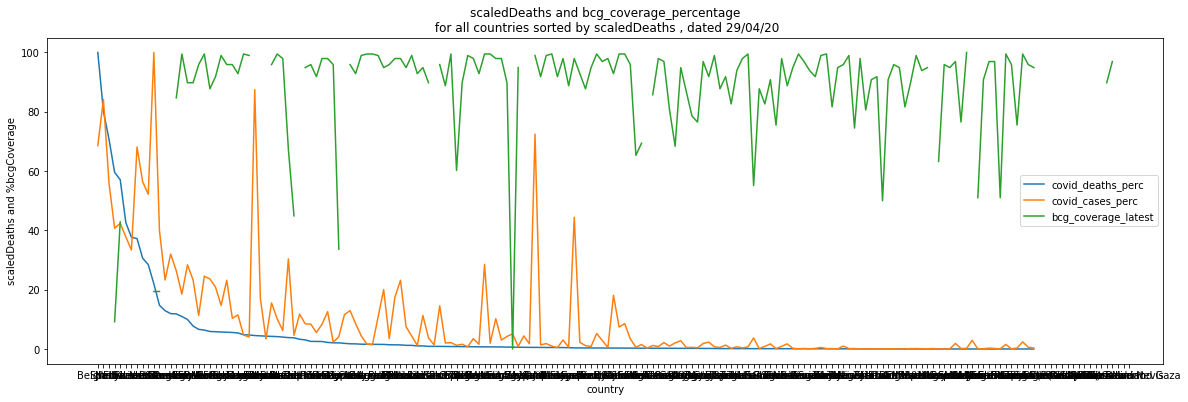

In [15]:
print("Scaled graphs which show numbers scaled to max_min values.\nFor e.g. to show death rates, a country which has highest death rate will be maked as 100%, and other country's death rates will be relative to this country.")

#plot chart
df1_1=df_scaled.sort_values('covid_deaths_perc',ascending=False)
ax1=plotCovid(df1_1,"scaledDeaths and bcg_coverage_percentage\n for all countries sorted by scaledDeaths",
              ylabel='scaledDeaths and %bcgCoverage')